In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [20]:
def f(x):
    return 100*(x[1] - x[0]**2)**2+(1-x[0])**2

In [21]:
def gradf(x):
    return np.array([-400*x[0]*(x[1]-x[0]**2)-2*(1-x[0]),200*(x[1]-x[0]**2)])

In [40]:
def golden2D(x, dr, TOL):
    R,err,loop=0.61803399,10,-1 
    adr = np.sqrt(dr**[0] + dr[1]**2)
    a= x-dr/adr
    b= x+dr/adr 
    while(err > TOL): 
        loop += 1 
        x1= b-R*(b-a) 
        x2= a+R*(b-a) 
        f1=f(x1) 
        f2=f(x2) 
        if(f2>f1): b=x2 
        else: a=x1 
        err = sum((a-b)**2)
        err = np.sqrt(err)
    xmin=a 
    return xmin, err, loop

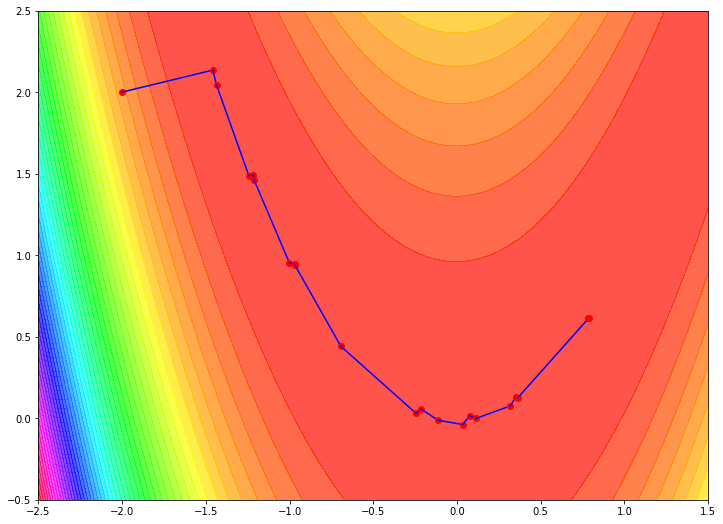

20 iterations


In [53]:
plt.rcParams["figure.figsize"] = (12,9)
x = np.linspace(-2.5,1.5,300)
y = np.linspace(-0.5,2.5,300)
X, Y = np.meshgrid(x,y)
E = f([X, Y])
cmap = plt.cm.gist_heat
dmax = np.max(E)
dmin = np.min(E)
con = plt.contourf(x, y, E, levels = np.linspace(dmin, dmax, 50),cmap = "hsv",alpha = 0.7)

TOL = 10**(-5)
x = np.array([-2,2])
dr1 = gradf(x)
plt.plot(x[0], x[1], 'ro')
x1, err, loop = golden2D(x, dr1, TOL)
err = (x1[1] - x[1])**2 + (x1[0] - x[0])**2
plt.plot([x[0], x1[0]],[x[1], x1[1]], 'b')
plt.plot(x1[0], x1[1], 'ro');x=x1

cnt = 0
while (err > TOL):
    cnt = cnt + 1
    dr2 = gradf(x) + ((gradf(x)[0]**2 + gradf(x)[1]**2) / (dr1[0]**2 + dr1[1]**2)) * dr1
    x1, err, loop = golden2D(x,dr2,TOL)
    dr1 = dr2
    err = (x1[1] - x[1])**2 + (x1[0] - x[0])**2
    plt.plot((x[0], x1[0]),[x[1], x1[1]], 'b')
    plt.plot(x1[0], x1[1], 'ro')
    x = x1
plt.show()
print('%d iterations'%cnt)